In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn import metrics
from sklearn.preprocessing import scale

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [34]:
from scipy.cluster.hierarchy import fcluster

In [8]:
import umap

In [13]:
import pandas as pd

In [5]:
# we shall be working on the dataset iris, which is already packaged in sklearn
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
# scale is a function that will let us scale the dataset
data = scale(digits.data)

In [7]:
# the following instruction will return the shape of the dataset
n_samples, n_features = data.shape
print("number of rows: ", n_samples)
print("number of features: ", n_features)

# the following instruction will return the number of different values in the target feature
n_digits = len(np.unique(digits.target))
print(n_digits)

number of rows:  1797
number of features:  64
10


Look - i'm gonna go for it - reduce the dataset to 2 dimensions and plot

In [9]:
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(data)

In [14]:
embedding_df = pd.DataFrame(embedding, columns=['comp1','comp2'])
embedding_df['target'] = digits.target

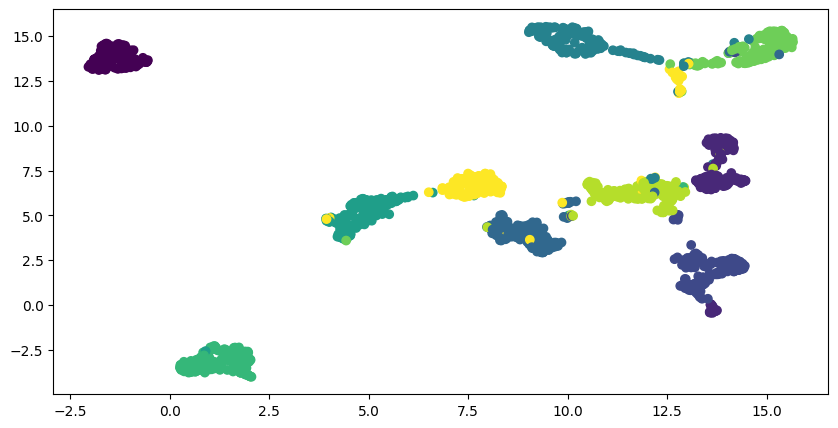

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(embedding_df['comp1'], embedding_df['comp2'], c=embedding_df['target'], cmap='viridis')


Use hierarchical clustering to cluster the dataset:
- linkage method: average
- metric: cosine distance

In [30]:
dist_matrix = pdist(data, metric='cosine')

In [33]:
Z = linkage(dist_matrix, method='average')

In [35]:
n_digits

10

In [36]:
labels = fcluster(Z, n_digits, criterion='maxclust')

In [37]:
# we can compute the silhouette score
print("Silhouette Coefficient: ", metrics.silhouette_score(data, labels))

Silhouette Coefficient:  0.10136613118253363


In [38]:
print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(data, labels))

Calinski_harabasz Coefficient: 97.42491105696615


In [40]:
print("Completeness score: ", metrics.completeness_score(digits.target, labels))

Completeness score:  0.7634716725737091


In [41]:
print("Homogeneity Score: ", metrics.homogeneity_score(digits.target, labels))

Homogeneity Score:  0.6779768165043589


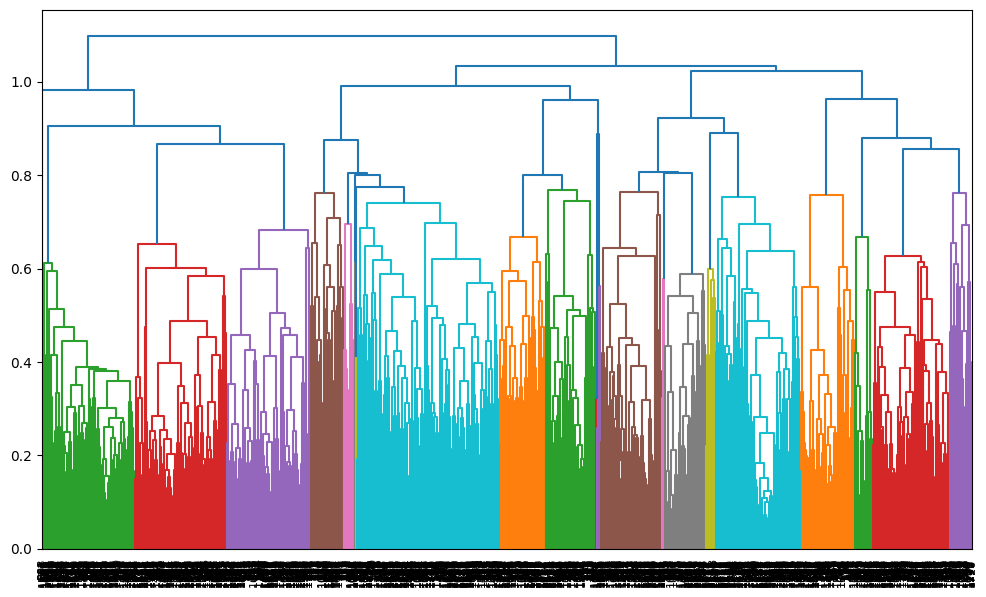

In [42]:
plt.figure(figsize=(12,7))
dendrogram(Z, leaf_rotation=90.,leaf_font_size=8.)
plt.show()